# **Ecosmart Pot, an iOT project to enhance urban plant care**

---



## **Introduction:**

## This project focuses on developing a smart gardening solution, the Ecosmart Pot, leveraging IoT technology to optimize plant care. Utilizing environmental data, we aim to create both a deep learning model and a time series model to predict and manage plant growth conditions, enhancing sustainability and efficiency in urban gardening.

## **Objectives:**

**Data Preprocessing:** Clean and prepare the dataset for analysis, ensuring it is suitable for modeling.

**Exploratory Data Analysis:** Conduct an in-depth analysis to understand the dataset's characteristics and identify patterns.

**Feature Selection:** Identify the most relevant features that will inform the predictive models.

**Model Selection:** Choose appropriate deep learning and time series modeling techniques based on the data and project goals.

**Model Training:** Develop and train models using the selected features to predict optimal plant care conditions.

**Evaluation:** Assess the models' performance and their potential impact on enhancing the Ecosmart Pot's functionality.

## Data Collection and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = '/content/train_data.csv'  # Update this path
data = pd.read_csv(data_path)

In [2]:
data.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


This data set has almost 250 colums, we'll need to evaluate the typed of data we need and extract those features once we're dont with our pre-processing.

Next we will  preprocess the data. This will involve handling any missing values, possibly encoding categorical variables if present, and preparing the dataset for the models. Given the nature of the data and our focus on specific features, we will also consider normalizing or standardizing the numerical data to ensure optimal model performance.

In [9]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 index                                 0
lat                                   0
lon                                   0
startdate                             0
contest-pevpr-sfc-gauss-14d__pevpr    0
                                     ..
wind-vwnd-925-2010-16                 1
wind-vwnd-925-2010-17                 1
wind-vwnd-925-2010-18                 1
wind-vwnd-925-2010-19                 1
wind-vwnd-925-2010-20                 1
Length: 246, dtype: int64


In [10]:
# We see there are some missing values but the amunt of missing values are not that large so we will use the
# mean to the idividual columns to impute the missing values and replace them with the mean.

# Replace missing values with the mean
data.fillna(data.mean(), inplace=True)

<ipython-input-10-df3f1dd9f168>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [11]:
# Check for missing values again in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 index                                 0
lat                                   0
lon                                   0
startdate                             0
contest-pevpr-sfc-gauss-14d__pevpr    0
                                     ..
wind-vwnd-925-2010-16                 0
wind-vwnd-925-2010-17                 0
wind-vwnd-925-2010-18                 0
wind-vwnd-925-2010-19                 0
wind-vwnd-925-2010-20                 0
Length: 246, dtype: int64


In [12]:
# show the data types of the columns
data.dtypes

index                                   int64
lat                                   float64
lon                                   float64
startdate                              object
contest-pevpr-sfc-gauss-14d__pevpr    float64
                                       ...   
wind-vwnd-925-2010-16                 float64
wind-vwnd-925-2010-17                 float64
wind-vwnd-925-2010-18                 float64
wind-vwnd-925-2010-19                 float64
wind-vwnd-925-2010-20                 float64
Length: 246, dtype: object

Given the data type of the columns, it's clear we're dealing with a mixture of numerical and categorical data. The column startdate being categorical and formatted as an object, we'll need to convert it to a datetime object. For the preprocessing step, we'll focus on ensuring the numerical data is properly scaled and the categorical data (startdate) is appropriately handled.

Handle the startdate column: Convert startdate from an object type to a datetime format. This conversion is essential if we plan to use this feature in our time series model or extract date-related features.

In [13]:
# Convert 'startdate' to datetime format
data['startdate'] = pd.to_datetime(data['startdate'])

In [14]:
data.dtypes

index                                          int64
lat                                          float64
lon                                          float64
startdate                             datetime64[ns]
contest-pevpr-sfc-gauss-14d__pevpr           float64
                                           ...      
wind-vwnd-925-2010-16                        float64
wind-vwnd-925-2010-17                        float64
wind-vwnd-925-2010-18                        float64
wind-vwnd-925-2010-19                        float64
wind-vwnd-925-2010-20                        float64
Length: 246, dtype: object

<ipython-input-8-8b86eb3eb746>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-8-8b86eb3eb746>:23: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()
<ipython-input-8-8b86eb3eb746>:26: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()
<ipython-input-8-8b86eb3eb746>:41: FutureWarning: The default value of numeric_only 

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
index,1.000000,0.971856,-0.293059,0.030772,-0.227430,-0.257829,-0.239677,-0.246893,-0.264992,-0.243487,...,-0.000092,0.000391,-0.000485,-0.000322,-0.000400,-0.000716,0.000345,0.000464,0.000158,0.000248
lat,0.971856,1.000000,-0.430178,0.075105,-0.232717,-0.274283,-0.243804,-0.251528,-0.261490,-0.248969,...,0.000719,0.000318,0.000583,-0.000564,-0.000563,0.000475,-0.001042,-0.000734,-0.000522,-0.000110
lon,-0.293059,-0.430178,1.000000,-0.231166,0.111764,0.196152,0.108622,0.104814,0.070863,0.117534,...,-0.000939,-0.000415,-0.000761,0.000736,0.000734,-0.000619,0.001360,0.000958,0.000681,0.000144
contest-pevpr-sfc-gauss-14d__pevpr,0.030772,0.075105,-0.231166,1.000000,0.516564,0.485141,0.515524,0.469911,0.519493,0.503934,...,-0.021677,-0.031090,-0.086969,0.069727,0.296282,0.088001,0.043768,0.257096,-0.049814,-0.029635
nmme0-tmp2m-34w__cancm30,-0.227430,-0.232717,0.111764,0.516564,1.000000,0.988039,0.986308,0.983069,0.975154,0.967966,...,-0.143488,-0.161671,0.181355,0.091353,0.174800,0.392824,-0.036392,0.257765,-0.205801,-0.172586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wind-vwnd-925-2010-16,-0.000716,0.000475,-0.000619,0.088001,0.392824,0.393146,0.354986,0.397478,0.373766,0.374916,...,0.004957,-0.296239,0.267482,-0.121171,0.218548,1.000000,-0.350538,0.089572,-0.067971,-0.031576
wind-vwnd-925-2010-17,0.000345,-0.001042,0.001360,0.043768,-0.036392,-0.042185,-0.034085,-0.056256,-0.035126,-0.050519,...,-0.018065,0.134786,-0.010340,0.155222,-0.095116,-0.350538,1.000000,-0.092907,0.026575,0.082408
wind-vwnd-925-2010-18,0.000464,-0.000734,0.000958,0.257096,0.257765,0.260289,0.165662,0.261509,0.255689,0.256162,...,0.111742,0.025927,-0.096488,-0.143060,0.024823,0.089572,-0.092907,1.000000,-0.181260,-0.323550
wind-vwnd-925-2010-19,0.000158,-0.000522,0.000681,-0.049814,-0.205801,-0.204143,-0.146735,-0.214189,-0.194584,-0.169699,...,-0.098983,-0.112147,0.045167,-0.074423,-0.013757,-0.067971,0.026575,-0.181260,1.000000,-0.106174


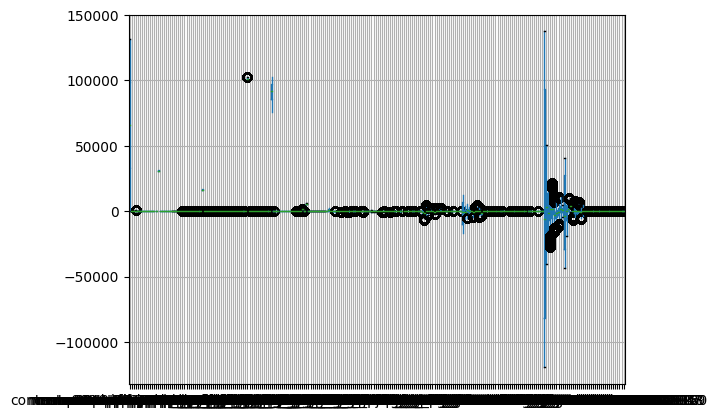

In [8]:
# list the number of columns in the data and their names for reference
data.columns

# Get the number of rows in the data
data.shape

# Get the data types of the columns
data.dtypes

# Check for missing values
data.isnull().sum()

# Check for duplicates
data.duplicated().sum()

# Check for outliers
data.describe()

# Check for correlation
data.corr()

# Check for skewness
data.skew()

# Check for kurtosis
data.kurt()

# Check for outliers
data.boxplot()

# Check for missing values
data.isnull().sum()

# Check for duplicates
data.duplicated().sum()

# Check for outliers
data.describe()

# Check for correlation
data.corr()

# Exploratory Data Analysis (EDA) with Visuals

Next we'll visually inspect the relationships between features, identify patterns, and possibly uncover insights that will inform our feature selection and model training steps.

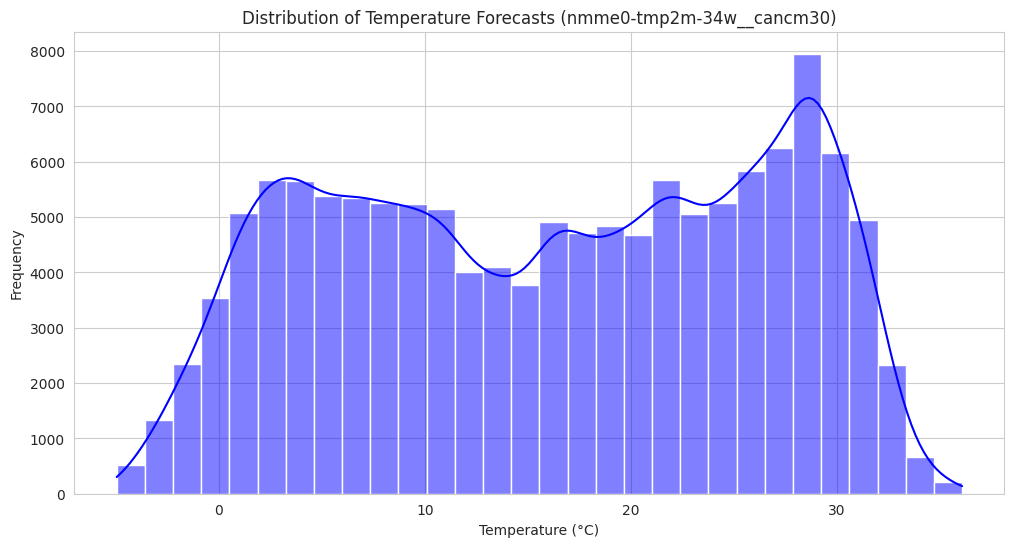

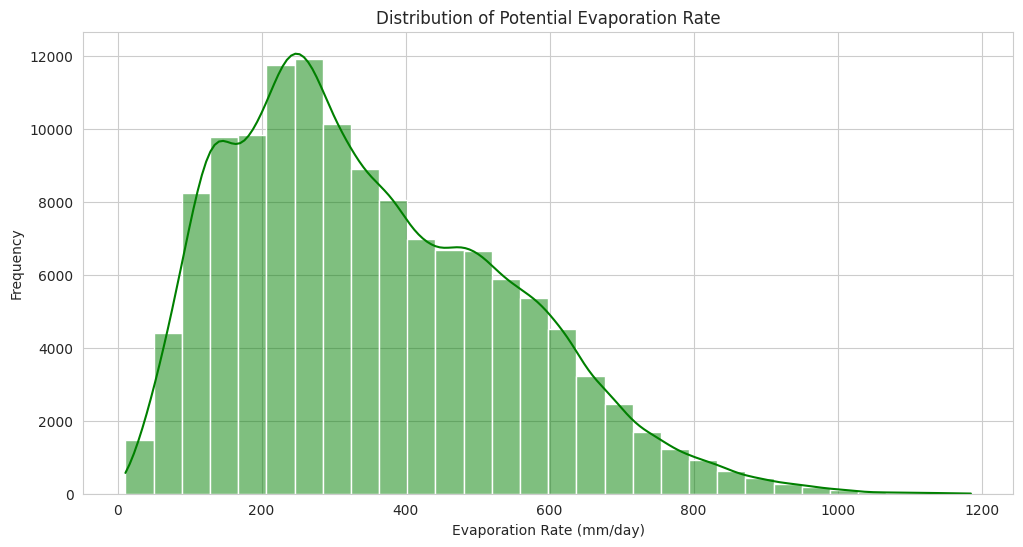

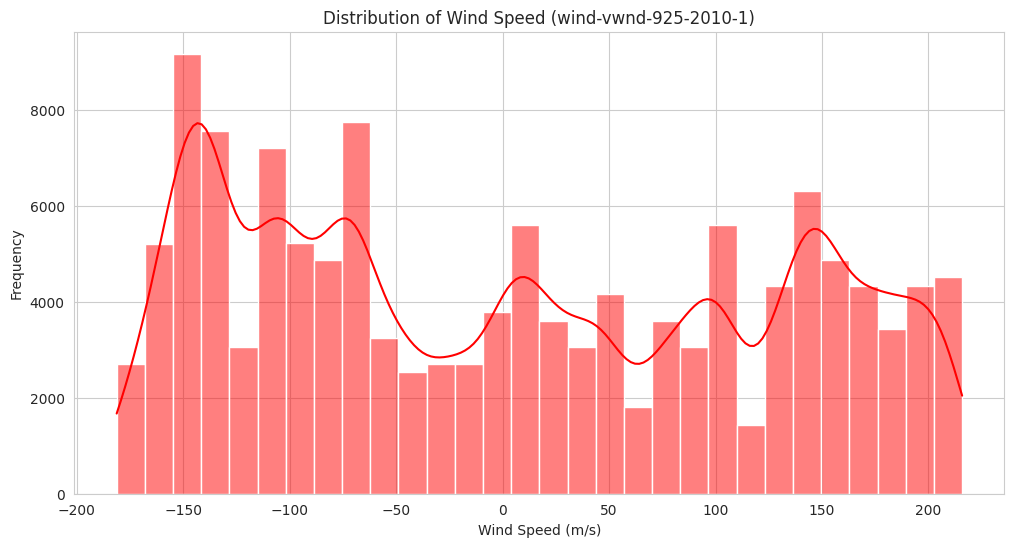

In [15]:
# Let's start by examining the distribution of the temperature forecasts, potential evaporation rate, and wind speed variables.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Temperature Forecast Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['nmme0-tmp2m-34w__cancm30'], bins=30, kde=True, color='blue')
plt.title('Distribution of Temperature Forecasts (nmme0-tmp2m-34w__cancm30)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Potential Evaporation Rate Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['contest-pevpr-sfc-gauss-14d__pevpr'], bins=30, kde=True, color='green')
plt.title('Distribution of Potential Evaporation Rate')
plt.xlabel('Evaporation Rate (mm/day)')
plt.ylabel('Frequency')
plt.show()

# Wind Speed Distribution (Example: wind-vwnd-925-2010-1)
plt.figure(figsize=(12, 6))
sns.histplot(data['wind-vwnd-925-2010-1'], bins=30, kde=True, color='red')
plt.title('Distribution of Wind Speed (wind-vwnd-925-2010-1)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()


The histograms we've generated above show some insights into the distributions of key environmental variables from the dataset, which are fundamental to the function of the Ecosmart Pot.

**Temperature Forecasts Distribution:**

The distribution appears to be bimodal, suggesting two different common temperature conditions. This could reflect different seasons or day versus night temperatures.
The presence of two peaks may require the model to recognize and adapt to these distinct modes, which could correspond to different plant care needs.

**Potential Evaporation Rate Distribution:**

The distribution is somewhat skewed to the right, indicating that while most days have moderate evaporation rates, there are occasional days with very high rates.
For the Ecosmart Pot, this suggests that while standard watering routines may work most of the time, there will be days that require significantly more water to compensate for increased evaporation.

**Wind Speed Distribution:**

The wind speed shows a wide distribution with several peaks, which might indicate varying wind conditions across different times or locations.
The Ecosmart Pot's wind protection mechanism will need to be responsive to a wide range of conditions, from calm days to potentially damaging wind speeds.

These distributions inform us about the environmental variability the Ecosmart Pot will encounter and must respond to. For instance, the temperature model will need to recognize and adjust to seasonal changes, while the irrigation system must be sensitive to the right tail of the evaporation rate distribution to prevent under-watering on particularly hot or dry days. Similarly, the wind protection feature must be robust to a variety of conditions.

For the deep learning model, understanding these distributions helps in designing a network that can handle the range and variability of the inputs.

For the time series model, the temporal aspect of these distributions will be crucial, especially if there are trends or seasonalities present in the data.

Now lets look at Time Series Plot of Temperature Forecasts Over Time
To understand temporal trends, plotting temperature forecasts against dates can be insightful.

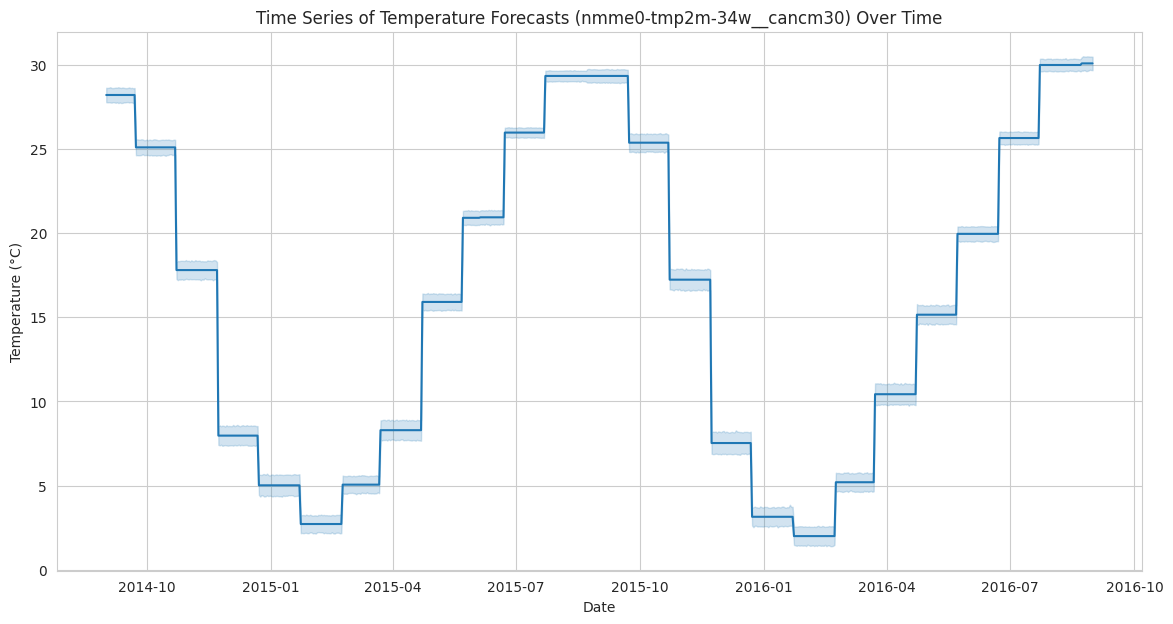

In [16]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='startdate', y='nmme0-tmp2m-34w__cancm30', data=data)
plt.title('Time Series of Temperature Forecasts (nmme0-tmp2m-34w__cancm30) Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


**The Time Series Plot of Temperature Forecasts Over Time graph shown above  reveals some key insights:**


**Seasonality:** The plot clearly shows a repeating pattern which suggests strong seasonality in temperature data. This is expected and is characterized by the sharp rises and falls, likely corresponding to the transition between warmer and cooler seasons.

**Stability**: Between the transitions, the temperature values seem to plateau, indicating periods of relative stability. For plants, these stable periods may be less stressful and could represent ideal growth phases.

**Predictability**: The regularity of the pattern indicates predictability, which is beneficial for forecasting. Our time series model can leverage this predictability to anticipate temperature changes and adjust care recommendations accordingly.

**Abrupt Change**s: The steepness of the transitions suggests rapid changes in temperature between seasons. The Ecosmart Pot will need to respond quickly to these changes to protect plants from potential stress, a key feature to enhanceing the effectiveness of our product.


In designing the time series model, incorporating components that can model seasonality (such as SARIMA or Fourier terms in a regression model) cab be frutufl for us to consider. Also, the model should be sensitive to abrupt changes, potentially using stateful models like LSTM networks that can remember and adapt to such transitions.

This temporal understanding will guide the Ecosmart Pot in scheduling interventions—like watering and temperature control—at the most appropriate times, optimizing plant growth conditions throughout the year.

Now lets do some data quality checks to have a clear understanding of the quality of our dataset. Address any issues found before proceeding to feature selection, as poor data quality can significantly affect model performance.

Check for Duplicate Records:
This will help you identify if there are any repeated rows that could skew our analysis.

In [18]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Consistency Checks:
Make sure the data follows the same standards and formats across the dataset.

In [21]:
#all dates should be in the same format
inconsistent_dates = data['startdate'].apply(lambda x: x.year not in range(2000, 2025))  # the range for our data set
print(f"Inconsistent dates: {inconsistent_dates.sum()}")

Inconsistent dates: 0


Negative Values in Potentially Positive-Only Measurements:
Certain environmental measurements, such as evaporation rates or wind speeds, are typically non-negative. Let's ensure these variables do not contain negative values.

In [22]:
# Check for negative values in evaporation rate
negative_evap_rates = data[data['contest-pevpr-sfc-gauss-14d__pevpr'] < 0]
print(f"Negative evaporation rates: {negative_evap_rates.shape[0]}")

# Check for negative wind speed values
for i in range(1, 21):
    negative_wind_speeds = data[data[f'wind-vwnd-925-2010-{i}'] < 0]
    print(f"Negative wind speeds in 'wind-vwnd-925-2010-{i}': {negative_wind_speeds.shape[0]}")


Negative evaporation rates: 0
Negative wind speeds in 'wind-vwnd-925-2010-1': 66151
Negative wind speeds in 'wind-vwnd-925-2010-2': 73972
Negative wind speeds in 'wind-vwnd-925-2010-3': 49933
Negative wind speeds in 'wind-vwnd-925-2010-4': 72325
Negative wind speeds in 'wind-vwnd-925-2010-5': 70356
Negative wind speeds in 'wind-vwnd-925-2010-6': 57888
Negative wind speeds in 'wind-vwnd-925-2010-7': 76833
Negative wind speeds in 'wind-vwnd-925-2010-8': 80104
Negative wind speeds in 'wind-vwnd-925-2010-9': 56586
Negative wind speeds in 'wind-vwnd-925-2010-10': 56996
Negative wind speeds in 'wind-vwnd-925-2010-11': 70329
Negative wind speeds in 'wind-vwnd-925-2010-12': 77536
Negative wind speeds in 'wind-vwnd-925-2010-13': 63111
Negative wind speeds in 'wind-vwnd-925-2010-14': 28869
Negative wind speeds in 'wind-vwnd-925-2010-15': 91663
Negative wind speeds in 'wind-vwnd-925-2010-16': 80797
Negative wind speeds in 'wind-vwnd-925-2010-17': 79579
Negative wind speeds in 'wind-vwnd-925-2010-

The presence of negative values in wind speed variables may not necessarily indicate incorrect data. In meteorology, wind speed can be reported as a vector with both magnitude and direction. The direction is often encoded as positive or negative values to indicate different directions. For example:

Positive values indicate wind blowing from the west to the east (westerlies).
Negative values indicate wind blowing from the east to the west (easterlies).

For modeling purposes:

For now, since the negative values correspond to wind direction, we wont consider them to be considered erroneous. Instead, they are a feature of how wind data is captured.

Extreme Temperature Values:
Temperatures that are too high or too low for the context (e.g., exceeding known temperature records for the area) might indicate data entry errors

In [23]:
# Define an acceptable temperature range based on the context
temp_range = (data['nmme0-tmp2m-34w__cancm30'].min(), data['nmme0-tmp2m-34w__cancm30'].max())
print(f"Temperature range observed: {temp_range}")

# Check for temperatures outside of this range
extreme_temperatures = data[(data['nmme0-tmp2m-34w__cancm30'] < -50) | (data['nmme0-tmp2m-34w__cancm30'] > 50)]
print(f"Extreme temperatures: {extreme_temperatures.shape[0]}")


Temperature range observed: (-4.96, 36.08)
Extreme temperatures: 0


It seems like there are no extreme temperatures in the dataset. Therefore, we can proceed with feature selection.

# Feature Selection

Light, Temperature and Humidity plant care from the Agricutula life association* ([Source](https://aggie-horticulture.tamu.edu/ornamental/a-reference-guide-to-plant-care-handling-and-merchandising/light-temperature-and-humidity/#:~:text=In%20general%2C%20foliage%20plants%20grow,degrees%20to%2060%20degrees%20F.))

**Light Intensity:**  Generally speaking, plants grown in low light tend to be spindly with light green leaves. However, plants require some period of darkness to properly develop and should be exposed to light for no more than 16 hours per day. Excessive light is as harmful as too little light.

**Temperature:** In general, foliage plants grow best between 70 degrees and 80 degrees F. during the day and between 60 degrees to 68 degrees F. at night. Most flowering plants prefer the same daytime temperature range, but grow best when nighttime temperatures range from 55 degrees to 60 degrees F. Lower nighttime temperatures help the plant: recover from moisture loss, intensify flower color and prolong flower life. Excessively low or high temperatures may cause: plant stress, inhibit growth, or promote a spindly appearance and foliage damage or drop. Cool nighttime temperatures are actually more desirable for plant growth than high temperatures. A good rule of thumb is to keep nighttime temperatures 10 to 15 degrees lower than daytime temperatures.


 **We've highlited these attribites as the key areas for our product to optimise around to keep our scope simple, for the purpose of this project.*




**Feature Selection Process:**

 Based on the optimal temperature ranges for foliage and flowering plants mentioned above, we aim to utilize specific features from our weather dataset to ensure the Ecosmart Pot can maintain these ideal conditions. This tailored approach towards feature selection is driven by the need to closely monitor and adjust the microenvironment surrounding the plants, leveraging the predictive power of machine learning to anticipate and react to potential deviations from these optimal ranges.


---


**Rationale for Feature Selection:**

**Temperature Forecasts** (nmme0-tmp2m-34w__cancm30, nmme0-tmp2m-34w__ccsm30):


These forecasts are crucial for predicting both daytime and nighttime temperatures, directly impacting plant health. By maintaining temperatures within 70 to 80 degrees F during the day and 60 to 68 degrees F (for foliage plants) and 55 to 60 degrees F (for flowering plants) at night, the Ecosmart Pot can ensure optimal growth conditions. The accuracy and foresight provided by these features allows for preemptive adjustments to the pot's environment, mitigating stress on the plants caused by temperature fluctuations.

**Potential Evaporation Rate** (contest-pevpr-sfc-gauss-14d__pevpr):

This rate is a key indicator of moisture loss from the soil and plant surfaces, which is inherently tied to temperature conditions. By monitoring this rate, the Ecosmart Pot can optimize watering schedules to ensure plants remain adequately hydrated without overwatering, especially critical during warmer conditions that fall within the optimal temperature range.

**Wind Speed and Direction** (wind-vwnd-925-2010-xx):

While primarily affecting temperature regulation through evaporation, wind speed and direction can also influence plant health by causing physical stress and increasing water loss. Managing exposure to wind complements the temperature management strategy by ensuring that environmental conditions remain stable and conducive to plant growth.



This approach aligns with our objective to create a responsive and intelligent plant care system that adapts to the needs of both foliage and flowering plants, guided by specific environmental conditions. By carefully selecting features that reflect the critical factors for plant health, we can develop a model that effectively predicts and manages the microenvironment within the Ecosmart Pot, ensuring optimal growth conditions for a wide range of plants.

Moving forward with this feature selection ensures that our models will be precisely focused on achieving the project's goals, using the rich environmental data available to us. This strategic approach lays the groundwork for the successful development and implementation of the Ecosmart Pot's predictive care capabilities.

**Engineering the Target Variable:**

Since our dataset primarily includes temperature forecasts, potential evaporation rates, and wind speed/direction, and considering the optimal temperature ranges for plant growth, we can define a target variable that represents the suitability of conditions for plant growth on any given day. This could be a binary variable indicating whether conditions are optimal (1) or not optimal (0) based on temperature ranges.



**Daytime Temperature Suitability**: Calculate a binary variable indicating whether the forecasted daytime temperature (nmme0-tmp2m-34w__cancm30 and nmme0-tmp2m-34w__ccsm30) falls within the optimal range of 70 to 80 degrees F.

**Nighttime Temperature Suitability**: Similarly, calculate a binary variable for nighttime temperatures, considering the different optimal ranges for foliage (60 to 68 degrees F) and flowering plants (55 to 60 degrees F).

**Overall Environmental Suitability**: Combine these indicators into a single target variable. For simplicity, this could mean conditions are considered optimal only if both daytime and nighttime temperatures are within their respective ranges.


In [27]:
# Our optimal temperatures are in Farenheit so we need to convert them to Celsius to fit the dataset
# Formula °C=(°F−32)× 5/9
#Daytime temperatures for foliage plants:
#70°F is approximately 21.1°C
#80°F is approximately 26.7°C

#Nighttime temperatures for foliage plants:
#60°F is approximately 15.6°C
#68°F is approximately 20°C

#Nighttime temperatures for flowering plants:
#55°F is approximately 12.8°C
#60°F is approximately 15.6°C

# Assuming 'temp_day' and 'temp_night' are the average daytime and nighttime temperatures from your dataset
data['day_temp_optimal'] = data.apply(lambda x: 1 if 21.1 <= x['nmme0-tmp2m-34w__cancm30'] <= 26.7 else 0, axis=1)
data['night_temp_optimal_foliage'] = data.apply(lambda x: 1 if 15.6 <= x['nmme0-tmp2m-34w__ccsm30'] <= 20 else 0, axis=1)
data['night_temp_optimal_flowering'] = data.apply(lambda x: 1 if 12.8 <= x['nmme0-tmp2m-34w__ccsm30'] <= 15.6 else 0, axis=1)

# Assuming foliage plants are our  primary concern
data['overall_temp_optimal'] = data['day_temp_optimal'] & data['night_temp_optimal_foliage']


In [28]:
data.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,day_temp_optimal,night_temp_optimal_foliage,night_temp_optimal_flowering,overall_temp_optimal
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,-2.03,48.13,28.09,-13.50,11.90,4.58,0,0,0,0
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,4.44,48.60,27.41,-23.77,15.44,3.42,0,0,0,0
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,5.01,48.53,19.21,-33.16,15.11,4.82,0,0,0,0
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,-1.41,50.59,8.29,-37.22,18.24,9.74,0,0,0,0
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,-5.21,54.73,-2.58,-42.30,21.91,10.95,0,0,0,0


In addtion to the features identified above, we can also get more granular and derive additional features that might indicate stress conditions more directly.

**Derived Features for Plant Stress:**

**Temperature Stress Indicator**: Create a feature that quantifies deviation from the optimal temperature range.

**Wind Stress Indicator**: High wind speeds can indicate potential stress conditions for plants. A derived feature that flags high wind speeds exceeding a certain threshold could be useful.

In [29]:
# Assuming the presence of columns for average wind speed ('wind_avg') and the optimal range flags from earlier
import numpy as np

# Temperature Stress Indicator: Difference from optimal range boundaries  23.9 C being the middle of the optimal range
data['temp_stress'] = np.where(data['day_temp_optimal'] == 0, abs(data[['nmme0-tmp2m-34w__cancm30', 'nmme0-tmp2m-34w__ccsm30']].mean(axis=1) - 23.9), 0)
#This line calculates a temp_stress indicator for each row in the dataset.
#The np.where function is used to conditionally assign values. The condition data['day_temp_optimal'] == 0 checks whether the day's temperature is outside the optimal range (not optimal).
#If the condition is true (temperature is not optimal), it calculates the absolute difference between the mean of the two temperature forecast columns (nmme0-tmp2m-34w__cancm30, nmme0-tmp2m-34w__ccsm30) and 23.9 degrees C (the midpoint of the optimal range of 21.1 to 26.7 degrees C).
#This difference gives us a measure of how far the temperature is from the optimal conditions for that whole day, indicating overall avrage stress.
#If the condition is false (temperature is within the optimal range), it assigns 0, indicating no temperature stress.

# Wind Stress Indicator: High wind speeds ( defining high wind speed as > 20 units)
data['wind_stress'] = np.where(data['wind-vwnd-925-2010-1'] > 20, 1, 0)  # This may need to refined based on more data from plant stress
#This line creates a wind_stress binary indicator based on wind speed.
#The condition data['wind-vwnd-925-2010-1'] > 20 checks if the wind speed exceeds 20 units ( considerd "high" wind speed for the application).

# Combine into a composite plant stress indicator (simple example, more sophisticated methods could be applied)
data['plant_stress_indicator'] = data['temp_stress'] + data['wind_stress']

In [30]:
data.head()


,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,day_temp_optimal,night_temp_optimal_foliage,night_temp_optimal_flowering,overall_temp_optimal,temp_stress,wind_stress,plant_stress_indicator
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,-13.50,11.90,4.58,0,0,0,0,45.705,0,45.705
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,-23.77,15.44,3.42,0,0,0,0,45.705,0,45.705
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,-33.16,15.11,4.82,0,0,0,0,45.705,0,45.705
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,-37.22,18.24,9.74,0,0,0,0,45.705,0,45.705
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,-42.30,21.91,10.95,0,0,0,0,45.705,0,45.705


Now that we have our Target Variable and features, we filter our dataset to only include the relevant columns for our models before proceeding to model selection and development.

In [31]:
# Define the columns we need for the models
required_columns = [
    'nmme0-tmp2m-34w__cancm30', 'nmme0-tmp2m-34w__ccsm30',  # Temperature Forecasts
    'contest-pevpr-sfc-gauss-14d__pevpr',  # Potential Evaporation Rate
    'wind-vwnd-925-2010-1',  # Example wind speed column
    'startdate',  # Date/Time Information
    # Derived target variables
    'day_temp_optimal', 'night_temp_optimal_foliage', 'night_temp_optimal_flowering',
    'overall_temp_optimal', 'temp_stress', 'wind_stress', 'plant_stress_indicator'
]

# Filter the dataset to only include these columns
filtered_data = data[required_columns].copy()

# Display the first few rows to verify the filtering
print(filtered_data.head())


   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__ccsm30  \
0                     29.02                    29.57   
1                     29.02                    29.57   
2                     29.02                    29.57   
3                     29.02                    29.57   
4                     29.02                    29.57   

   contest-pevpr-sfc-gauss-14d__pevpr  wind-vwnd-925-2010-1  startdate  \
0                              237.00               -107.46 2014-09-01   
1                              228.90               -105.73 2014-09-02   
2                              220.69               -102.51 2014-09-03   
3                              225.28                -96.11 2014-09-04   
4                              237.24                -89.19 2014-09-05   

   day_temp_optimal  night_temp_optimal_foliage  night_temp_optimal_flowering  \
0                 0                           0                             0   
1                 0                           0         

In [33]:
# Save the filtered dataset to a CSV file
filtered_data.to_csv('/content/filtered_ecosmart_pot_data.csv', index=False)

/content/filtered_ecosmart_pot_data.csv


# Next steps; Ecosmart Pot Project: Model Development Strategy

For the Ecosmart Pot project, we're focusing on two main models to predict environmental conditions and plant stress. Below is a detailed approach for each model, including sample training methods, features, and target variables.

### Time Series Model

**Features:**
- **Temperature Forecasts:** `nmme0-tmp2m-34w__cancm30`, `nmme0-tmp2m-34w__ccsm30`
- **Potential Evaporation Rate:** `contest-pevpr-sfc-gauss-14d__pevpr`
- **Wind Speed:** Representative measures from `wind-vwnd-925-2010-xx`
- **Temporal Features:** Extracted from `startdate`, such as month and season

**Target Variable:**
- `overall_temp_optimal`: Indicates whether overall temperature conditions are optimal.

**Sample Training Method:**
- **Long Short-Term Memory (LSTM):** Suitable for capturing temporal dependencies in time series data, ideal for forecasting environmental conditions.

### Deep Learning Model

**Features:**
- Environmental features used in the Time Series Model.
- **Derived Features:**
  - `temp_stress`: Indicates temperature deviation from optimal ranges.
  - `wind_stress`: Indicates high wind speeds.

**Target Variable:**
- `plant_stress_indicator`: Composite measure of plant stress based on temperature and wind conditions.

**Sample Training Method:**
- **Convolutional Neural Networks (CNN) for Time Series Data:** Applying 1D CNNs can effectively learn spatial hierarchies in sequences of environmental data, detecting patterns contributing to plant stress.

### Features and Target Variables Recap

- **For Both Models:** Utilize core environmental features focusing on temperature forecasts, evaporation rates, and wind conditions.
- **Time Series Model Target:** Predicts `overall_temp_optimal`, focusing on long-term environmental suitability.
- **Deep Learning Model Target:** Focuses on `plant_stress_indicator`, quantifying immediate plant stress levels.

### Training Considerations

- **Data Splitting:** Ensure chronological splitting for time-sensitive models.
- **Feature Engineering:** Calculate derived features like `temp_stress` and `wind_stress` prior to training for the deep learning model.
- **Hyperparameter Tuning:** Essential for optimizing model performance, including adjustments to learning rate, layers, and units for LSTM/CNN.

By following this structured approach, the project aims to develop predictive models that enhance the Ecosmart Pot's capability to maintain optimal plant growth conditions.
